In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle
import os
from PIL import Image


In [16]:
import os
import numpy as np
import cv2

def load_and_preprocess_images(data_folder, max_images_per_class=1000):
    """Charger et prétraiter les images pour les transformer en vecteurs."""
    
    image_data = []
    labels = []
    total_loaded = 0  # Compteur d'images chargées

    # Charger et prétraiter les images
    if os.path.isdir(data_folder):
        images = [
            img for img in os.listdir(data_folder) if img.endswith((".jpg", ".png"))
        ]
        selected_images = images[:max_images_per_class]

        for image_file in selected_images:
            img_path = os.path.join(data_folder, image_file)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Erreur de chargement de l'image : {img_path}")
                continue

            img = cv2.resize(img, (64, 64))  # Redimensionner à 64x64
            img_vector = img.flatten()  # Aplatir le tableau d'image
            image_data.append(img_vector)
            labels.append("Cat")  # Ajouter une étiquette pour toutes les images
            total_loaded += 1  # Incrémente le compteur d'images

        print(f"Total des images chargées : {total_loaded}")  # Affiche le total chargé
        return np.array(image_data), np.array(labels)
    else:
        print("Le dossier n'existe pas :", data_folder)
        return np.array([]), np.array([])

# Exemple d'utilisation
if __name__ == "__main__":
    DATA_FOLDER = "PetImages/Cat"  # Chemin vers le sous-dossier contenant les images de chats

    # Vérifier si le dossier existe
    if os.path.exists(DATA_FOLDER):
        image_vectors, labels = load_and_preprocess_images(DATA_FOLDER)

        # Afficher la forme des vecteurs d'image
        print("Shape of image vectors:", image_vectors.shape)
    else:
        print("Le dossier n'existe pas :", DATA_FOLDER)


Erreur de chargement de l'image : PetImages/Cat/10125.jpg
Erreur de chargement de l'image : PetImages/Cat/10404.jpg
Erreur de chargement de l'image : PetImages/Cat/10501.jpg
Erreur de chargement de l'image : PetImages/Cat/10820.jpg
Total des images chargées : 996
Shape of image vectors: (996, 12288)


In [17]:
import os
import numpy as np
import cv2

def load_and_preprocess_images(data_folder, max_images_per_class=1000):
    """Charger et prétraiter les images pour les transformer en vecteurs."""
    
    image_data = []
    labels = []
    total_loaded = 0  # Compteur d'images chargées

    # Charger et prétraiter les images
    if os.path.isdir(data_folder):
        images = [
            img for img in os.listdir(data_folder) if img.endswith((".jpg", ".png"))
        ]
        selected_images = images[:max_images_per_class]

        for image_file in selected_images:
            img_path = os.path.join(data_folder, image_file)
            img = cv2.imread(img_path)

            # Vérifier si l'image a été chargée correctement
            if img is None:
                print(f"Erreur de chargement de l'image : {img_path} - peut-être un fichier corrompu ou un format non pris en charge.")
                continue

            img = cv2.resize(img, (64, 64))  # Redimensionner à 64x64
            img_vector = img.flatten()  # Aplatir le tableau d'image
            image_data.append(img_vector)
            labels.append("Cat")  # Ajouter une étiquette pour toutes les images
            total_loaded += 1  # Incrémente le compteur d'images

        print(f"Total des images chargées : {total_loaded}")  # Affiche le total chargé
        return np.array(image_data), np.array(labels)
    else:
        print("Le dossier n'existe pas :", data_folder)
        return np.array([]), np.array([])

# Exemple d'utilisation
if __name__ == "__main__":
    DATA_FOLDER = "PetImages/Cat"  # Chemin vers le sous-dossier contenant les images de chats

    # Vérifier si le dossier existe
    if os.path.exists(DATA_FOLDER):
        image_vectors, labels = load_and_preprocess_images(DATA_FOLDER)

        # Afficher la forme des vecteurs d'image
        print("Shape of image vectors:", image_vectors.shape)
    else:
        print("Le dossier n'existe pas :", DATA_FOLDER)


Erreur de chargement de l'image : PetImages/Cat/10125.jpg - peut-être un fichier corrompu ou un format non pris en charge.
Erreur de chargement de l'image : PetImages/Cat/10404.jpg - peut-être un fichier corrompu ou un format non pris en charge.
Erreur de chargement de l'image : PetImages/Cat/10501.jpg - peut-être un fichier corrompu ou un format non pris en charge.
Erreur de chargement de l'image : PetImages/Cat/10820.jpg - peut-être un fichier corrompu ou un format non pris en charge.
Total des images chargées : 996
Shape of image vectors: (996, 12288)


In [18]:
len([f for f in os.listdir("PetImages/Cat") if f.endswith((".jpg", ".png"))])



12500

In [19]:
import os
from PIL import Image
import numpy as np

DATA_FOLDER = "PetImages/Cat"  # Remplacez par le bon chemin d'accès à votre dossier
image_data = []

# Compteur d'images chargées
loaded_count = 0

for image_file in os.listdir(DATA_FOLDER):
    if image_file.endswith((".jpg", ".png")):
        image_path = os.path.join(DATA_FOLDER, image_file)
        try:
            # Charger et redimensionner l'image
            image = Image.open(image_path).resize((64, 64)).convert("L")  # Redimensionner à 64x64 et convertir en niveaux de gris
            image_array = np.array(image)  # Convertir l'image en tableau numpy

            # Calculer un vecteur d'embedding simple en prenant la moyenne des pixels
            embedding = image_array.flatten().mean()
            image_data.append(embedding)  # Ajouter le vecteur d'embedding à la liste
            loaded_count += 1
        except Exception as e:
            print(f"Erreur de chargement de l'image : {image_path}, Erreur: {e}")

print(f"Total des images chargées : {loaded_count}")
print(f"Shape of image vectors: {np.array(image_data).shape}")  # Afficher la forme des vecteurs d'embedding


Erreur de chargement de l'image : PetImages/Cat/666.jpg, Erreur: cannot identify image file 'PetImages/Cat/666.jpg'
Total des images chargées : 12499
Shape of image vectors: (12499,)


In [22]:
import os
from PIL import Image
import numpy as np
import pandas as pd

# Définir les chemins pour les images de chats et de chiens
DATA_FOLDERS = {
    'cat': "PetImages/Cat",
    'dog': "PetImages/Dog"
}
image_data = []
labels = []

# Compteur d'images chargées
loaded_count = 0

for label, folder in DATA_FOLDERS.items():
    for image_file in os.listdir(folder):
        if image_file.endswith((".jpg", ".png")):
            image_path = os.path.join(folder, image_file)
            try:
                # Charger et redimensionner l'image
                image = Image.open(image_path).resize((64, 64)).convert("L")
                image_array = np.array(image)
                
                # Calculer un vecteur d'embedding simple
                embedding = image_array.flatten().mean()
                image_data.append(embedding)
                labels.append(label)  # Ajouter l'étiquette (cat ou dog)
                loaded_count += 1
            except Exception as e:
                print(f"Erreur de chargement de l'image : {image_path}, Erreur: {e}")

print(f"Total des images chargées : {loaded_count}")

# Créer un DataFrame à partir des données d'embedding et des labels
df = pd.DataFrame({'embedding': image_data, 'label': labels})

# Spécifiez le chemin pour le fichier CSV dans le même répertoire que le notebook
output_csv = "ref_data.csv"  # Enregistrer directement dans le répertoire du notebook

# Enregistrer le DataFrame dans un fichier CSV
df.to_csv(output_csv, index=False)
print(f"Données enregistrées dans le fichier : {output_csv}")


Erreur de chargement de l'image : PetImages/Cat/666.jpg, Erreur: cannot identify image file 'PetImages/Cat/666.jpg'
Erreur de chargement de l'image : PetImages/Dog/11702.jpg, Erreur: cannot identify image file 'PetImages/Dog/11702.jpg'
Total des images chargées : 24998
Données enregistrées dans le fichier : ref_data.csv


In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd

# Définir les chemins pour les images de chats et de chiens
DATA_FOLDERS = {
    'cat': "PetImages/Cat",
    'dog': "PetImages/Dog"
}
image_data = []
labels = []

# Compteur d'images chargées
loaded_count = 0

for label, folder in DATA_FOLDERS.items():
    for image_file in os.listdir(folder):
        if image_file.endswith((".jpg", ".png")):
            image_path = os.path.join(folder, image_file)
            try:
                # Charger et redimensionner l'image
                image = Image.open(image_path).resize((32, 32)).convert("L")
                image_array = np.array(image)

                # Calculer un vecteur d'embedding simple
                embedding = image_array.flatten().mean()
                image_data.append(embedding)
                labels.append(label)  # Ajouter l'étiquette (cat ou dog)
                loaded_count += 1
            except Exception as e:
                print(f"Erreur de chargement de l'image : {image_path}, Erreur: {e}")

print(f"Total des images chargées : {loaded_count}")

# Créer un DataFrame à partir des données d'embedding et des labels
df = pd.DataFrame({'embedding': image_data, 'label': labels})

# Enregistrer le DataFrame dans un fichier CSV
output_csv = "ref_data.csv"
df.to_csv(output_csv, index=False)
print(f"Données enregistrées dans le fichier : {output_csv}")


Erreur de chargement de l'image : PetImages/Cat/666.jpg, Erreur: cannot identify image file 'PetImages/Cat/666.jpg'
Erreur de chargement de l'image : PetImages/Dog/11702.jpg, Erreur: cannot identify image file 'PetImages/Dog/11702.jpg'


/opt/conda/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Total des images chargées : 24998
Données enregistrées dans le fichier : ref_data.csv


In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Définir les chemins pour les images de chats et de chiens
DATA_FOLDERS = {
    'cat': "PetImages/Cat",
    'dog': "PetImages/Dog"
}

image_data = []
labels = []

# Compteur d'images chargées
loaded_count = 0

for label, folder in DATA_FOLDERS.items():
    for image_file in os.listdir(folder):
        if image_file.endswith((".jpg", ".png")):
            image_path = os.path.join(folder, image_file)
            try:
                # Charger et redimensionner l'image
                image = Image.open(image_path).resize((32, 32)).convert("L")  # Redimensionner à 64x64 et convertir en niveaux de gris
                image_array = np.array(image)  # Convertir l'image en tableau numpy

                # Aplatir l'image en un vecteur
                vector = image_array.flatten()  # Transformer l'image en vecteur
                image_data.append(vector)  # Ajouter le vecteur à la liste
                labels.append(label)  # Ajouter l'étiquette (cat ou dog)
                loaded_count += 1
            except Exception as e:
                print(f"Erreur de chargement de l'image : {image_path}, Erreur: {e}")

print(f"Total des images chargées : {loaded_count}")

# Créer un DataFrame à partir des données d'image et des labels
df = pd.DataFrame(image_data)
df['label'] = labels  # Ajouter la colonne des étiquettes

# Enregistrer le DataFrame dans un fichier CSV
output_csv = "ref_data.csv"
df.to_csv(output_csv, index=False)
print(f"Données enregistrées dans le fichier : {output_csv}")


Erreur de chargement de l'image : PetImages/Cat/666.jpg, Erreur: cannot identify image file 'PetImages/Cat/666.jpg'
Erreur de chargement de l'image : PetImages/Dog/11702.jpg, Erreur: cannot identify image file 'PetImages/Dog/11702.jpg'


/opt/conda/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Total des images chargées : 24998
Données enregistrées dans le fichier : ref_data.csv


In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def normalize_data(X_train, X_test):
    
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)  # Ajuster et transformer les données d'entraînement
    X_test_normalized = scaler.transform(X_test)        # Transformer les données de test
    
    return X_train_normalized, X_test_normalized

ROC: 0.70
F1 Score: 0.69


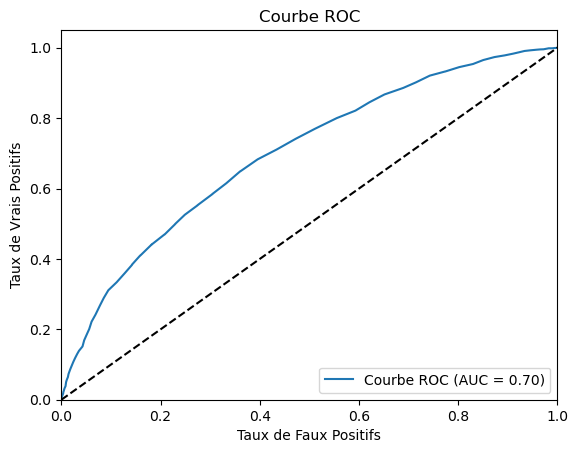

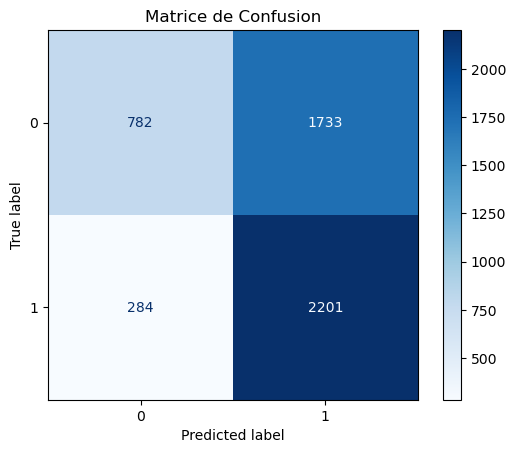

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

def load_data(filepath):
    """Charge le jeu de données à partir d'un fichier CSV."""
    return pd.read_csv(filepath)

def preprocess_data(df):
    """Sépare les caractéristiques et les étiquettes, et encode les étiquettes."""
    X = df.drop(columns=['label'])  # Caractéristiques (vecteurs d'images)
    y = df['label']  # Étiquettes
    # Encoder les étiquettes
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)  # Encode les étiquettes en entiers
    return X, y_encoded  # Ne retourne plus l'encodeur

def normalize_data(X_train, X_test):
    """Normalise les données d'entraînement et de test."""
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)  # Ajuster et transformer les données d'entraînement
    X_test_normalized = scaler.transform(X_test)        # Transformer les données de test
    return X_train_normalized, X_test_normalized

def train_model(X_train, y_train):
    """Entraîne un modèle de Random Forest."""
    model = RandomForestClassifier(random_state=42)  # Fixer le random_state pour la reproductibilité
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """Évalue le modèle en calculant l'AUC-ROC et le F1 Score."""
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Seuil de 0.5 pour les prédictions binaires
    f1 = f1_score(y_test, y_pred)
    return auc_roc, f1, y_pred_prob, y_pred

def plot_roc_curve(y_test, y_pred_prob, auc_roc):
    """Trace la courbe ROC."""
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title('Courbe ROC')
    plt.legend(loc='lower right')
    plt.show()

def plot_confusion_matrix(y_test, y_pred):
    """Affiche la matrice de confusion."""
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matrice de Confusion')
    plt.show()

if __name__ == "__main__":
    # Chargement des données
    df = load_data("ref_data.csv")

    # Prétraitement des données
    X, y = preprocess_data(df)  # Ne retourne plus l'encodeur
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalisation des données
    X_train_normalized, X_test_normalized = normalize_data(X_train, X_test)

    # Entraînement du modèle
    model = train_model(X_train_normalized, y_train)

    # Évaluation du modèle
    auc_roc, f1, y_pred_prob, y_pred = evaluate_model(model, X_test_normalized, y_test)
    print(f"ROC: {auc_roc:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Tracer la courbe ROC
    plot_roc_curve(y_test, y_pred_prob, auc_roc)
    plot_confusion_matrix(y_test, y_pred)
